In [1]:
# Read in and re-format genres
genres = open('genres').readlines()
g_list = []
for line in genres:
    for g in line.split():
        g_list.append(g.lower().replace('-','_'))
        
# Write file
# g_list[0] = '{' + g_list[0]
# g_list[-1] = g_list[-1] + '}'
# with open('genre_list', 'w') as f:
#     f.write(",".join(g_list))

In [2]:
data = {}
for genre in g_list:
    f = open('year_summaries/'+genre).readlines()
    counts = [line.split() for line in f]
    data[genre] = {}
    for yr_ct in counts[2:-1]:
        year = yr_ct[1]
        qty = int(yr_ct[2][1:-1].replace(',',''))
        data[genre][year] = qty

In [52]:
M = int(data[g_list[0]].keys()[0])
m = int(M)
for genre in g_list:
    tmp_M = int(max(data[genre].keys()))
    tmp_m = int(min(data[genre].keys()))
    if tmp_M > M: 
        M = tmp_M
    if tmp_m < m:
        m = tmp_m
print 'm =', m
print 'M =', M

m = 1896
M = 2020


In [19]:
import numpy as np

In [32]:
for genre in g_list:
        line = []
        for yr in range(M - m):
            try:
                line.append(str(data[genre][str(yr + m)]))
            except KeyError:
                line.append('0')
#         f.write('%s,%s\n',genre,",".join(line))
#         print '{:},{:}\n'.format(genre,",".join(line))

In [47]:
# data_array = np.array
M = 2015 # Only consider completed years
with open('data.csv', 'w') as f:
    f.write('Genre,')
    [f.write('%d,' % yr) for yr in range(m, M)]
    f.write('%d\n' % M)
    for genre in g_list:
        line = []
        for yr in range(M - m + 1):
            try:
                line.append(str(data[genre][str(yr + m)]))
            except KeyError:
                line.append('0')
        f.write("{:},{:}\n".format(genre,",".join(line)))

In [56]:
data['documentary']['1896']

520

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
x = []
y = []
for a,b in data['action'].iteritems():
    x.append(a)
    y.append(b)

In [101]:
data.values()

[{'1911': 22,
  '1912': 30,
  '1913': 20,
  '1922': 18,
  '1923': 21,
  '1924': 23,
  '1925': 28,
  '1926': 23,
  '1927': 23,
  '1928': 27,
  '1929': 63,
  '1930': 76,
  '1931': 91,
  '1932': 108,
  '1933': 90,
  '1934': 95,
  '1935': 101,
  '1936': 126,
  '1937': 175,
  '1938': 150,
  '1939': 156,
  '1940': 129,
  '1941': 138,
  '1942': 144,
  '1943': 99,
  '1944': 103,
  '1945': 86,
  '1946': 121,
  '1947': 131,
  '1948': 201,
  '1949': 352,
  '1950': 516,
  '1951': 594,
  '1952': 720,
  '1953': 922,
  '1954': 950,
  '1955': 1152,
  '1956': 1239,
  '1957': 1470,
  '1958': 1550,
  '1959': 1540,
  '1960': 1907,
  '1961': 1841,
  '1962': 1674,
  '1963': 1800,
  '1964': 1765,
  '1965': 2288,
  '1966': 2154,
  '1967': 2361,
  '1968': 2172,
  '1969': 1865,
  '1970': 2045,
  '1971': 1984,
  '1972': 1983,
  '1973': 2003,
  '1974': 2116,
  '1975': 2318,
  '1976': 2075,
  '1977': 2098,
  '1978': 2027,
  '1979': 1957,
  '1980': 1943,
  '1981': 1927,
  '1982': 2193,
  '1983': 2366,
  '1984': 309

[('1948', 104),
 ('1949', 108),
 ('1942', 95),
 ('1943', 56),
 ('1940', 73),
 ('1941', 101),
 ('1946', 67),
 ('1947', 91),
 ('1944', 57),
 ('1945', 49),
 ('2019', 53),
 ('2018', 128),
 ('2015', 7372),
 ('2014', 8592),
 ('2017', 535),
 ('2016', 2128),
 ('2011', 7917),
 ('2010', 6967),
 ('2013', 8199),
 ('2012', 8513),
 ('1955', 206),
 ('1954', 226),
 ('1957', 327),
 ('1956', 209),
 ('1951', 138),
 ('1950', 108),
 ('1953', 306),
 ('1952', 213),
 ('1959', 504),
 ('1958', 519),
 ('1922', 47),
 ('1924', 45),
 ('1925', 76),
 ('1926', 124),
 ('1927', 80),
 ('1928', 88),
 ('1929', 58),
 ('1933', 48),
 ('1932', 66),
 ('1931', 49),
 ('1930', 56),
 ('1937', 106),
 ('1936', 86),
 ('1935', 115),
 ('1934', 65),
 ('1939', 106),
 ('1938', 108),
 ('1986', 1609),
 ('1987', 1921),
 ('1984', 1248),
 ('1985', 1846),
 ('1982', 882),
 ('1983', 1292),
 ('1980', 933),
 ('1981', 823),
 ('1988', 1437),
 ('1989', 1460),
 ('1919', 38),
 ('1915', 39),
 ('1916', 44),
 ('1991', 1661),
 ('1990', 1515),
 ('1993', 1987)

In [64]:
aa = [[x,y] for x,y in data['action'].iteritems()]

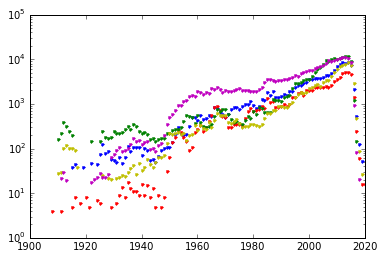

In [110]:
plt.semilogy(data['action'].keys(), data['action'].values(),'b.')
plt.plot(data['sci_fi'].keys(), data['sci_fi'].values(),'r.')
plt.semilogy(data['romance'].keys(), data['romance'].values(),'g.')
plt.semilogy(data['thriller'].keys(), data['thriller'].values(),'y.')
plt.semilogy(data['family'].keys(), data['family'].values(),'m.')
plt.show()

In [84]:
help(data['action'].values)

Help on built-in function values:

values(...)
    D.values() -> list of D's values



In [62]:
aa.sort()
aa

[['1915', 39],
 ['1916', 44],
 ['1919', 38],
 ['1922', 47],
 ['1924', 45],
 ['1925', 76],
 ['1926', 124],
 ['1927', 80],
 ['1928', 88],
 ['1929', 58],
 ['1930', 56],
 ['1931', 49],
 ['1932', 66],
 ['1933', 48],
 ['1934', 65],
 ['1935', 115],
 ['1936', 86],
 ['1937', 106],
 ['1938', 108],
 ['1939', 106],
 ['1940', 73],
 ['1941', 101],
 ['1942', 95],
 ['1943', 56],
 ['1944', 57],
 ['1945', 49],
 ['1946', 67],
 ['1947', 91],
 ['1948', 104],
 ['1949', 108],
 ['1950', 108],
 ['1951', 138],
 ['1952', 213],
 ['1953', 306],
 ['1954', 226],
 ['1955', 206],
 ['1956', 209],
 ['1957', 327],
 ['1958', 519],
 ['1959', 504],
 ['1960', 446],
 ['1961', 553],
 ['1962', 461],
 ['1963', 477],
 ['1964', 551],
 ['1965', 548],
 ['1966', 869],
 ['1967', 803],
 ['1968', 672],
 ['1969', 584],
 ['1970', 516],
 ['1971', 584],
 ['1972', 765],
 ['1973', 849],
 ['1974', 859],
 ['1975', 751],
 ['1976', 898],
 ['1977', 979],
 ['1978', 976],
 ['1979', 1169],
 ['1980', 933],
 ['1981', 823],
 ['1982', 882],
 ['1983', 129